# Gráficos de Violin

####  Simularemos as notas cunha normal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
NUM_ALU=100

x=np.random.uniform(-1,1)
notas=np.random.normal(5+x,3+x/2,10)
notas=np.round(notas)
notas

        

array([ 8.,  2.,  6., 11.,  4.,  3., -0.,  5., 10.,  5.])

In [3]:

import pandas as pd

materias=['Matemáticas','Inglés','Lingua Castelá','Lingua Galega', 
          'Xeografía e Historia','Educación Física','Bioloxía','Física e Química']
df=pd.DataFrame(columns=('materia','nota'))

for k in materias:
    x=np.random.uniform(-1,1)
    notas=np.random.normal(np.random.randint(5)+3+x,2+x/2,NUM_ALU)
    notas=np.round(notas)
    df2=pd.DataFrame({'materia':k,'nota':notas})
    df=df.append(df2,ignore_index=True)
df



,materia,nota
0,Matemáticas,5.0
1,Matemáticas,7.0
2,Matemáticas,4.0
3,Matemáticas,4.0
4,Matemáticas,5.0
...,...,...
795,Física e Química,5.0
796,Física e Química,6.0
797,Física e Química,5.0
798,Física e Química,4.0


###  gráfico de violín


In [4]:
df.nota=df.nota.map(lambda x: 10 if x>10 else x)
df.nota=df.nota.map(lambda x: 0 if x<0 else x)

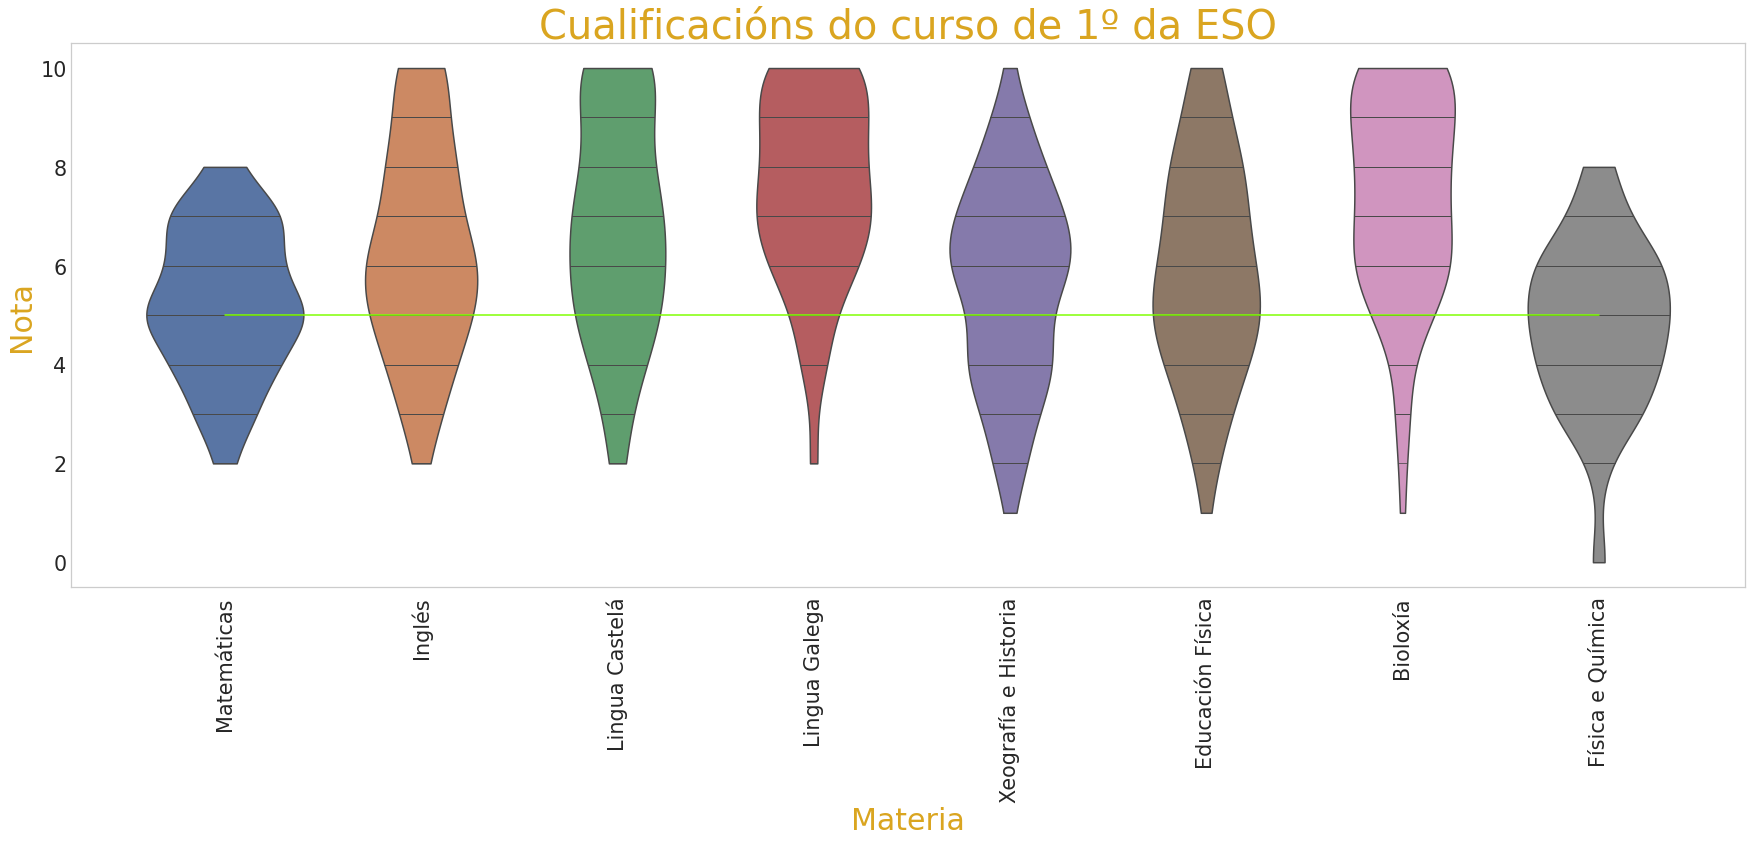

In [5]:


sns.set(style="whitegrid")
_, ax = plt.subplots(figsize=(30,10))
sns.violinplot(ax=ax,x="materia", y="nota", data=df,
                    inner="stick",cut=0)
ax.set_ylabel("Nota",size=30,color='GoldenRod')
ax.set_xlabel("Materia",size=30,color='GoldenRod')
ax.get_xaxis().set_tick_params(rotation=90,labelsize='xx-large')
ax.get_yaxis().set_tick_params(labelsize='xx-large',length=1)
ax.grid(False)
ax.set_title("Cualificacións do curso de 1º da ESO",size=40,color='GoldenRod')
lista5=[5 for _ in range(len(materias))]
plt.plot(materias,lista5,color='Chartreuse')

In [6]:
df.groupby('materia')['nota'].median()

materia
Bioloxía                8.0
Educación Física        6.0
Física e Química        5.0
Inglés                  6.0
Lingua Castelá          7.0
Lingua Galega           8.0
Matemáticas             5.0
Xeografía e Historia    6.0
Name: nota, dtype: float64

## Matriz de Correlacións


df2=pd.DataFrame()
for materia in materias:
    lista=list(df.loc[df['materia']==materia]['nota'])
    df2[materia]=lista
df2

In [19]:
df2.corr()

,Matemáticas,Inglés,Lingua Castelá,Lingua Galega,Xeografía e Historia,Educación Física,Bioloxía,Física e Química
Matemáticas,1.000000,0.096403,0.003624,-0.061687,-0.065488,0.176443,-0.030686,-0.185443
Inglés,0.096403,1.000000,-0.063921,-0.086707,0.008527,0.029638,0.000915,0.164939
Lingua Castelá,0.003624,-0.063921,1.000000,0.044861,0.029875,0.020094,-0.015132,-0.146097
Lingua Galega,-0.061687,-0.086707,0.044861,1.000000,0.127452,0.125652,0.005104,-0.061531
Xeografía e Historia,-0.065488,0.008527,0.029875,0.127452,1.000000,-0.048273,0.035715,-0.125083
Educación Física,0.176443,0.029638,0.020094,0.125652,-0.048273,1.000000,-0.066060,0.088363
Bioloxía,-0.030686,0.000915,-0.015132,0.005104,0.035715,-0.066060,1.000000,0.122753
Física e Química,-0.185443,0.164939,-0.146097,-0.061531,-0.125083,0.088363,0.122753,1.000000


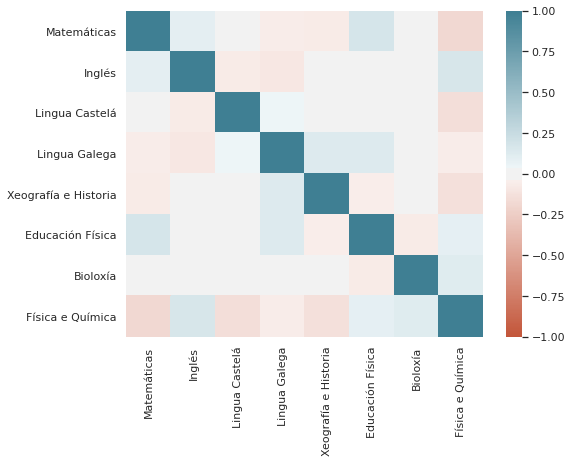

In [34]:
_,ax=plt.subplots(figsize=(8,6))
sns.heatmap(df2.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True),ax=ax)

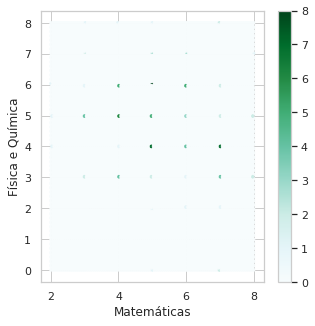

In [48]:

ax=df2.plot.hexbin(x='Matemáticas',y='Física e Química',sharex=False,figsize=(5,5))

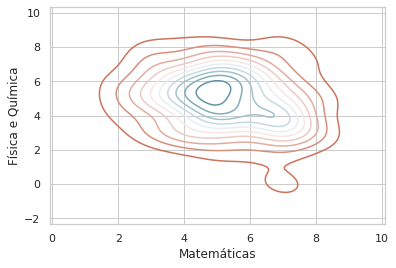

In [99]:
ax=sns.kdeplot(df2['Matemáticas'],df2['Física e Química'],
            cmap=sns.diverging_palette(20,220,as_cmap=True))


Text(0.5, 0, 'Física e Química')

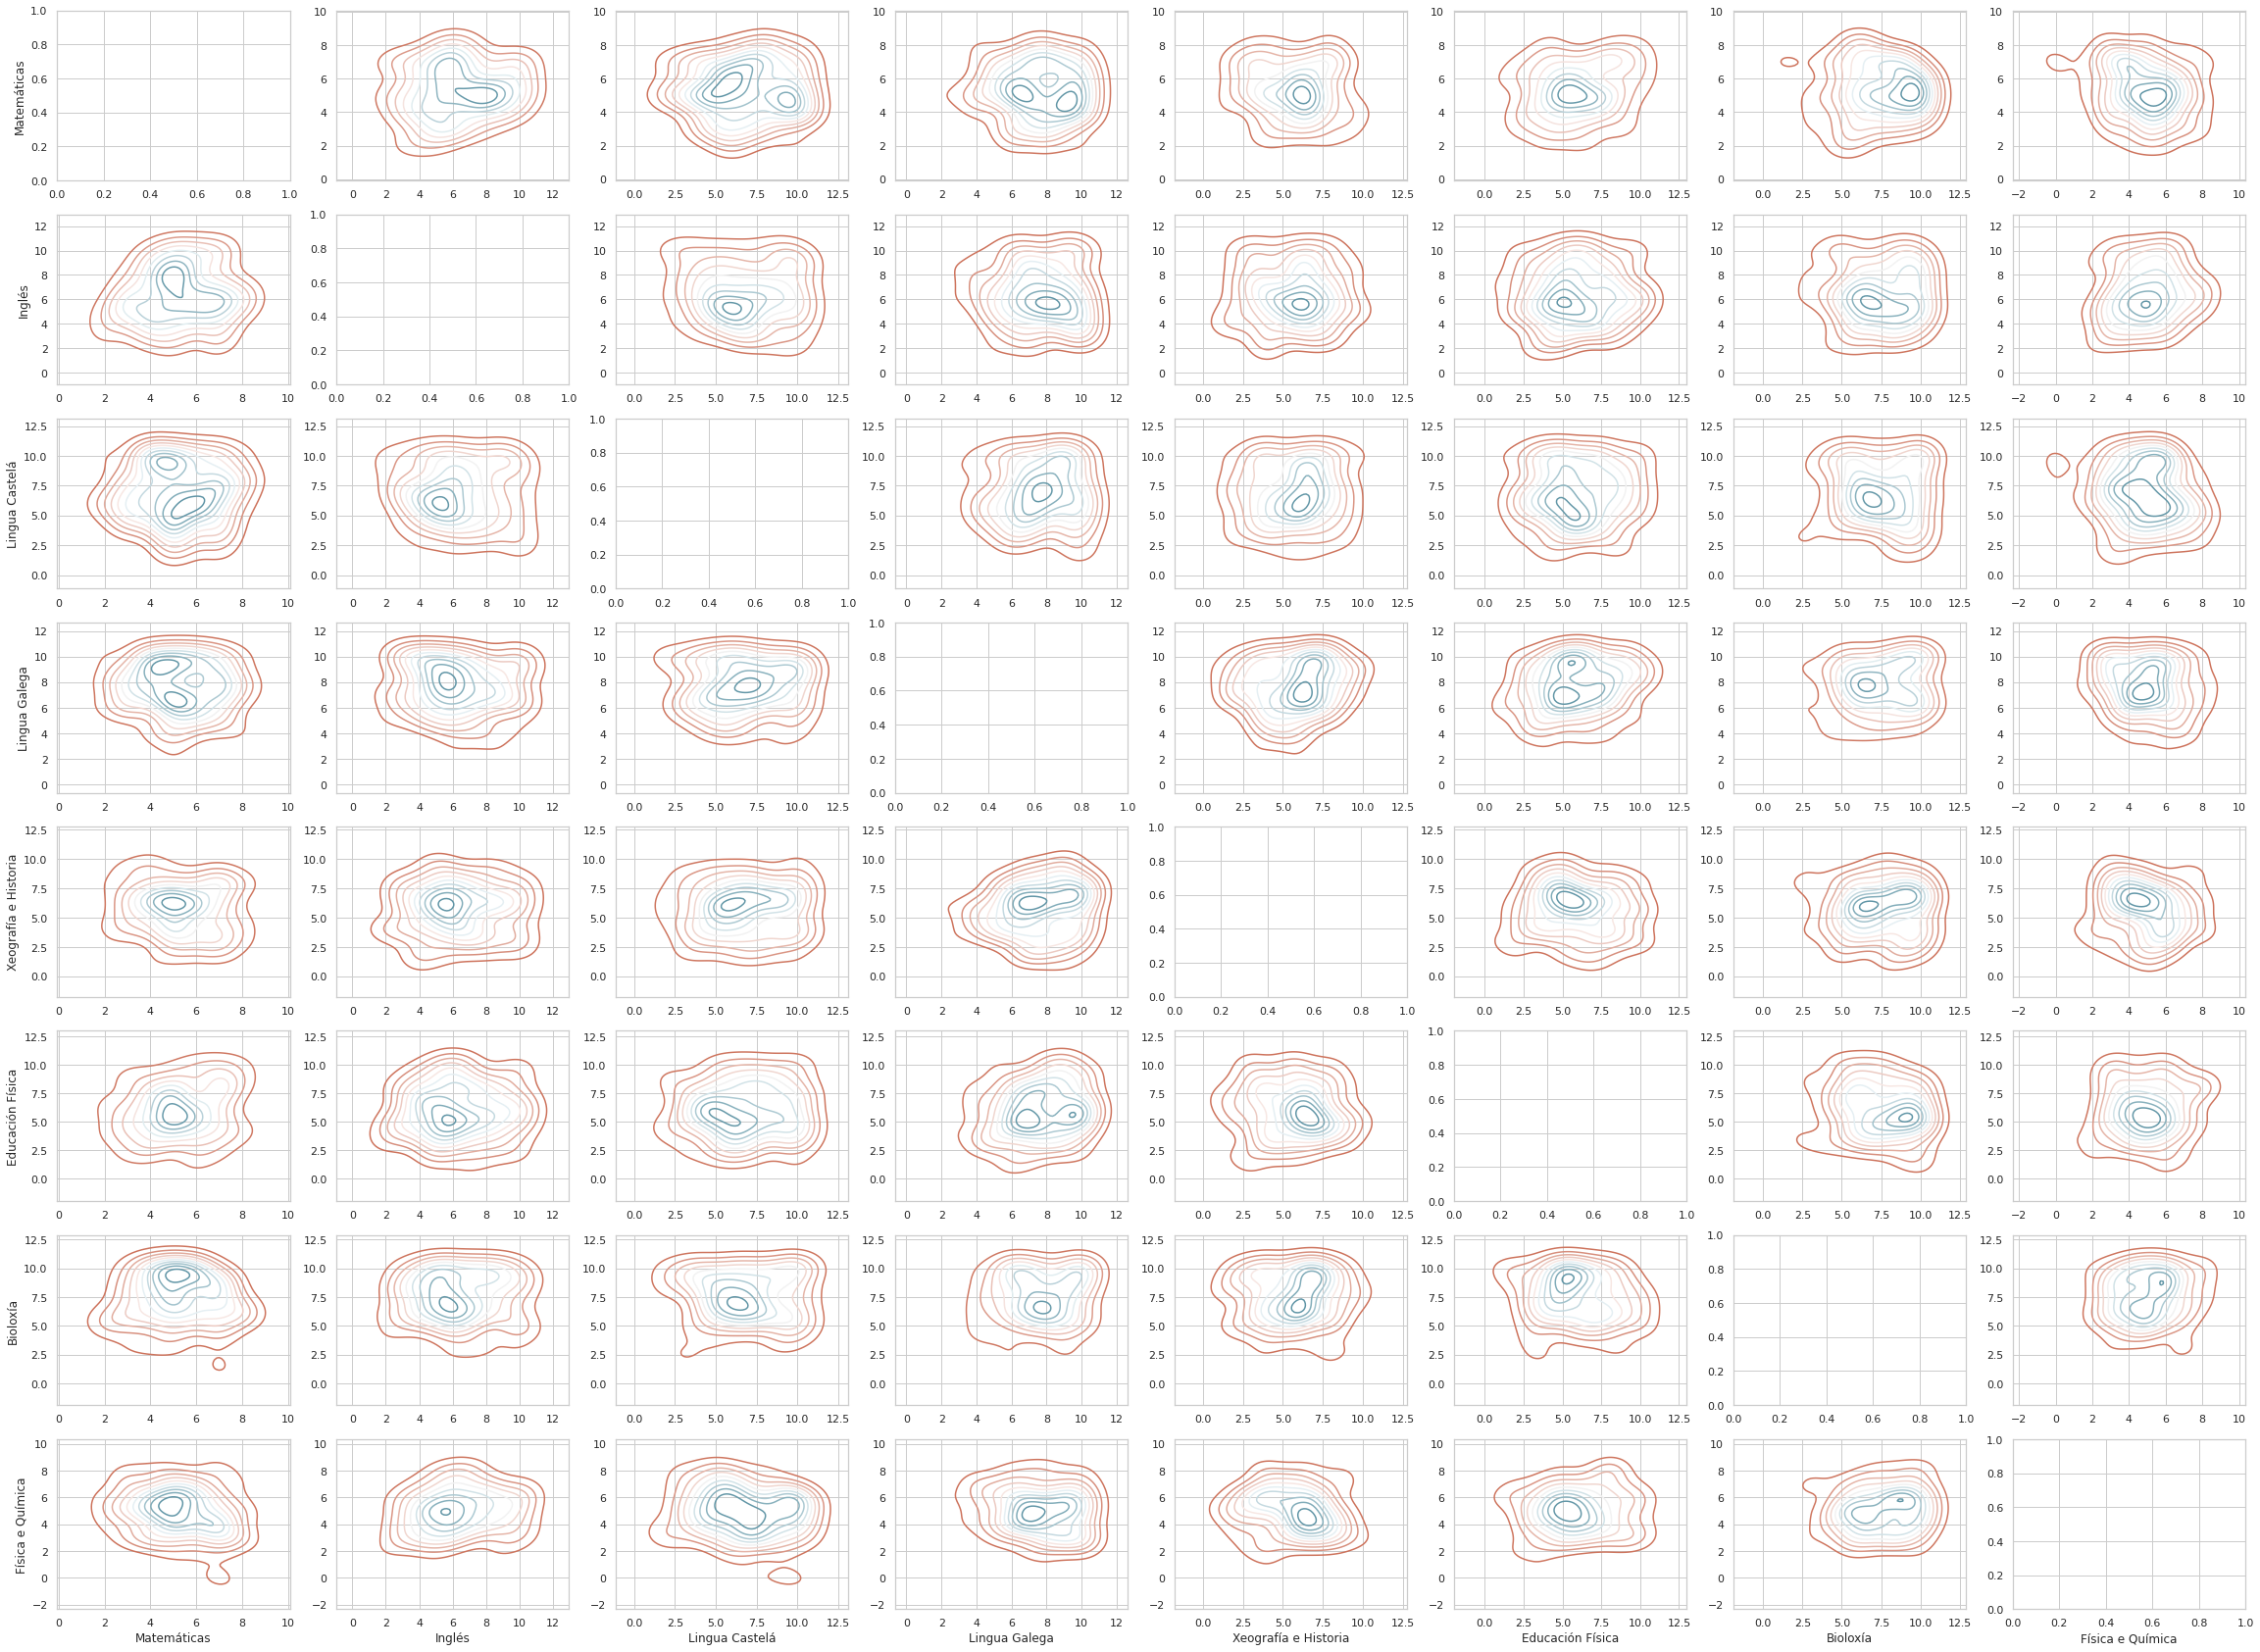

In [118]:
fig,ax=plt.subplots(8,8,figsize=(40,30))
for materia,i in zip(materias,range(len(materias))):
    for materia2,j in zip(materias,range(len(materias))):
        #df2.plot.hexbin(x=materia2,y=materia,sharex=False,ax=(ax[i,j]))
        #df2.plot.scatter(x=materia2,y=materia,sharex=False,ax=(ax[i,j]),c='red',alpha=0.25)
        if(i!=j):
            sns.kdeplot(df2[materia2],df2[materia],
                    cmap=sns.diverging_palette(20,220,as_cmap=True),ax=ax[i,j])
        if j>0:
            ax[i,j].set_ylabel('')
        if i<(len(materias)-1):
            ax[i,j].set_xlabel('')
ax[0,0].set_ylabel('Matemáticas')
ax[7,7].set_xlabel('Física e Química')